In [2]:
import math
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
page_id = "cheche730"

path = 'post/'+page_id+'_post.csv'

In [4]:
data = pd.read_csv(path, encoding = 'utf8')

In [5]:
data.head()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,203789756445700_916123725212296,2018 第一廠！🤣\r\n\r\n#綠茵闖蕩 #其實Eason嘅歌都係陪我哋成長,17/18 綠茵闖蕩 #37A - 賽事規管知多些 - 不小心策騎,video,https://www.facebook.com/203789756445700/posts...,2018-01-06 23:49:54,25,0,2,20,4,0,0,1,0
1,203789756445700_916049955219673,今日收穫好豐富！今年 #AIA友邦歐陸嘉年華2017 邀請咗25個嚟自世界各地嘅表演者組成雜...,Photos from 車車 cheche 張紫櫻's post,photo,https://www.facebook.com/203789756445700/posts...,2018-01-06 20:50:52,171,0,1,154,10,1,5,1,0
2,203789756445700_915577555266913,好多男人都愛車如命，話部車係佢老婆！睇完呢條片，我明哂～\r\n\r\n#愛車之人可以去到幾盡,Flow,video,https://www.facebook.com/203789756445700/posts...,2018-01-05 21:18:18,77,12,0,31,0,10,36,0,0
3,203789756445700_915119311979404,2018第一次開廠！\r\n\r\n#hkjc #workhard #綠茵闖蕩 #工作是快樂的,NaN,video,https://www.facebook.com/203789756445700/posts...,2018-01-04 23:06:01,79,6,3,56,4,2,16,1,0
4,203789756445700_913651018792900,無佢！我應該只係一個鍾意睇波嘅小Fans。\r\n無佢！我應該唔會喺電台開咪做足球節目。\r...,BF People & Life,video,https://www.facebook.com/203789756445700/posts...,2018-01-02 03:33:57,94,2,0,89,1,0,2,2,0


In [6]:
len(data)

2710

In [7]:
data = data[(data['num_reactions']!=0) & (data['status_message'].notnull())].reindex()

In [8]:
len(data)

2604

In [9]:
data['datetime'] = data['status_published'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
data['weekday'] = data['datetime'].apply(lambda x: x.weekday_name)
data['hour'] = data['datetime'].apply(lambda x:  x.hour)

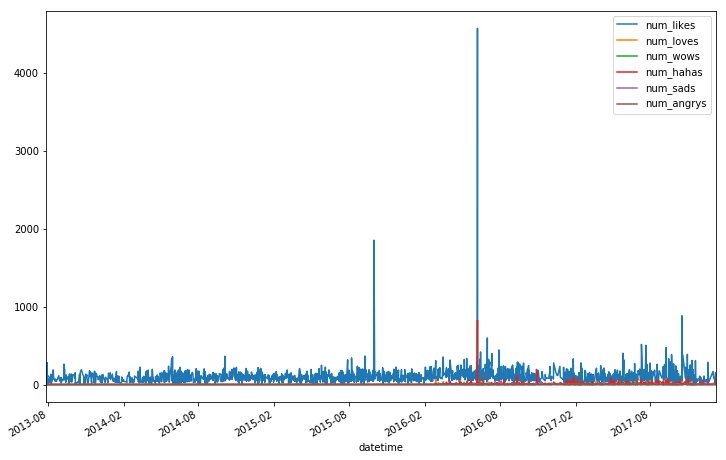

In [10]:
data.plot(x='datetime', y=['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'] ,
       figsize=(12,8))

In [15]:
data[data['num_likes'] >1500]
data2 = data.drop([973,1384])


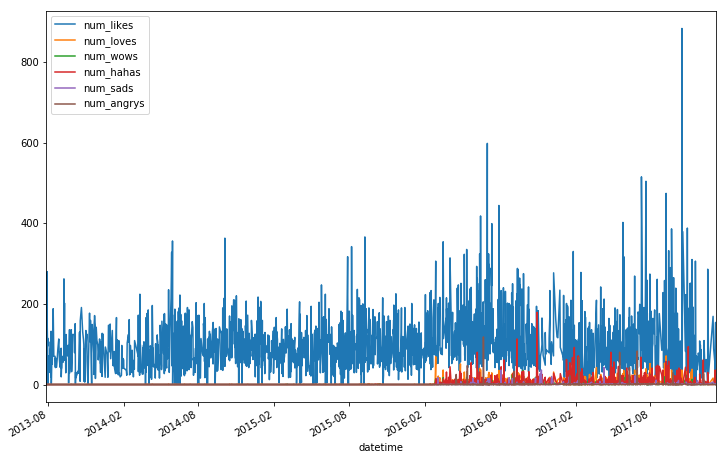

In [16]:
data2.plot(x='datetime', y=['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'] ,
       figsize=(12,8))

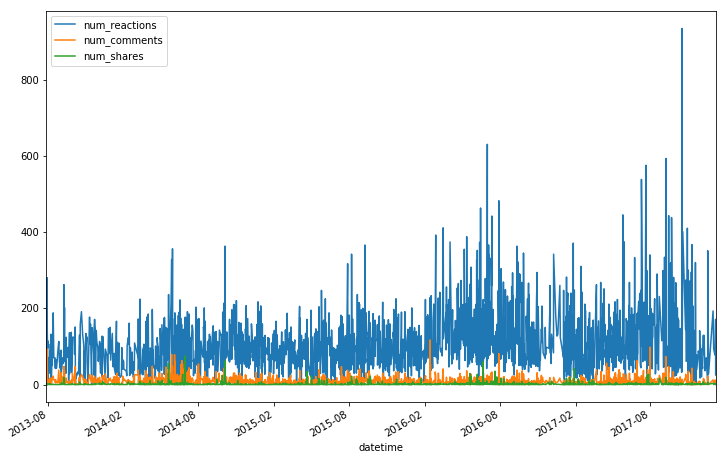

In [17]:
data2.plot(x='datetime', y=['num_reactions', 'num_comments', 'num_shares'],
       figsize=(12,8))

In [19]:
import datetime
delta_datetime = data['datetime'].shift(1) - data['datetime']
delta_datetime_df = pd.Series(delta_datetime).describe().apply(str)
delta_datetime_df = delta_datetime_df.to_frame(name='frequent of posts')
delta_datetime_df

,frequent of posts
count,2603
mean,0 days 14:58:50.763349
std,0 days 18:44:38.707192
min,0 days 00:00:00
25%,0 days 03:11:50.500000
50%,0 days 09:38:32
75%,0 days 20:07:41
max,10 days 22:55:01


In [20]:
def weekday(d):
    list_key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    list_value = []
    for one in list_key:
        if one in d.keys():
            list_value.append(d[one])
        else:
            list_value.append(0)
    df = pd.DataFrame(index = list_key, data = {'weekday': list_value}).reset_index()
    return df

In [21]:
df_weekday = weekday(dict(data['weekday'].value_counts()))
df_weekday

,index,weekday
0,Monday,322
1,Tuesday,361
2,Wednesday,404
3,Thursday,419
4,Friday,378
5,Saturday,353
6,Sunday,367


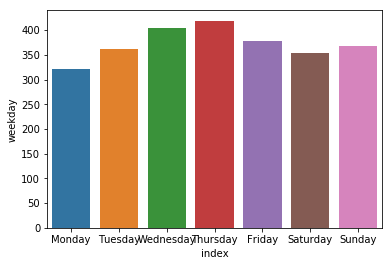

In [22]:
sns.barplot(x='index', y='weekday', data = df_weekday)

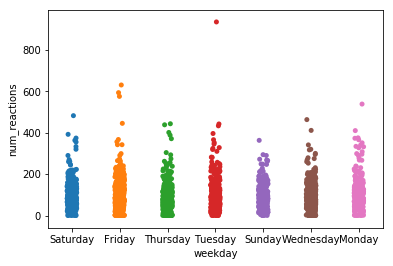

In [23]:
sns.stripplot(x='weekday',y='num_reactions', data = data2, jitter=True)

In [24]:

def hour(d):
    list_key = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    list_value = []
    for one in list_key:
        if one in d.keys():
            list_value.append(d[one])
        else:
            list_value.append(0)
    df = pd.DataFrame(index = list_key, data = {'hour': list_value}).reset_index()
    return df

In [26]:
df_hour = hour(dict(data['hour'].value_counts()))
df_hour

,index,hour
0,0,213
1,1,178
2,2,155
3,3,154
4,4,118
5,5,106
6,6,67
7,7,62
8,8,50
9,9,46


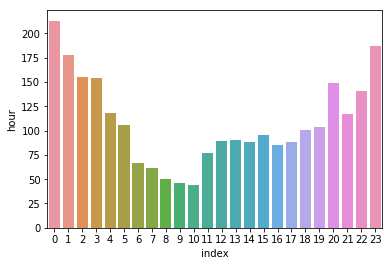

In [27]:
ax = sns.barplot(x='index', y='hour', data = df_hour)

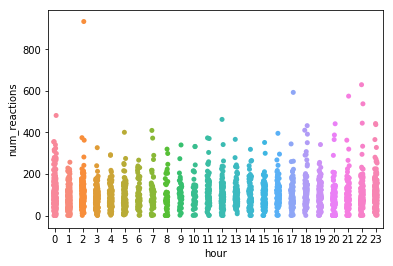

In [28]:
sns.stripplot(x='hour',y='num_reactions', data = data2, jitter=True)

In [29]:
df_status_type = data['status_type'].value_counts().to_frame(name='status_type')
df_status_type

,status_type
photo,2074
video,255
link,166
status,108
event,1


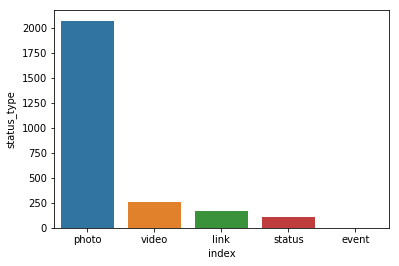

In [30]:
sns.barplot(x='index', y='status_type', data = df_status_type.reset_index())

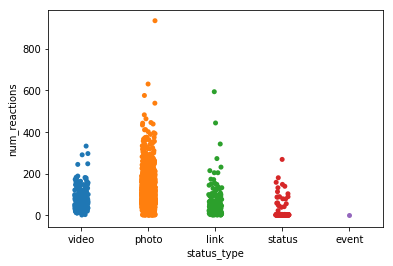

In [31]:
sns.stripplot(x="status_type", y="num_reactions", data=data2, jitter=True)

In [32]:
import jieba
import jieba.analyse
import operator
from wordcloud import WordCloud, STOPWORDS

In [33]:
list(data['status_message'])[324]

'喺咁嘅環境下......係要發吓神經！\r\n\r\n#就嚟跌啦杯野 #rooftop #octave #打碟嗰個D歌真係差少少 #我係一個釘SA #未飲已經似飲大咗 #naturalhigh #返房先堅飲 #relaxing'

In [34]:
for one in jieba.cut(list(data['status_message'])[99]):
    print (one)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Tommy\AppData\Local\Temp\jieba.cache
Loading model cost 1.055 seconds.
Prefix dict has been built succesfully.


我
已經
盡量
集中
精神
！


但
真
係
有
一刻
諗
咗
啲
無聊野
，
諗
完
自己
忍
唔
到
笑
！
🤣
今晚
有
得
睇
！




#
hkjc


#
綠茵
闖
蕩


#
留意
斟
啤酒
那個
人


#
happywednesday


#
oktoberfest


In [35]:
jieba.analyse.extract_tags(list(data['status_message'])[99], topK=20)

['已經',
 '盡量',
 '無聊野',
 'hkjc',
 '綠茵',
 '那個',
 'happywednesday',
 'oktoberfest',
 '留意',
 '一刻',
 '啤酒',
 '今晚',
 '精神',
 '集中',
 '自己']

In [36]:
def jieba_extract(message_list):
    word_count = {}
    for message in message_list:
        seg_list = jieba.analyse.extract_tags(message, topK=120)
        for seg in seg_list:
            if not seg in word_count:
                word_count[seg] = 1
            else:
                word_count[seg] += 1

    sorted_word_count = sorted(word_count.items(), key=operator.itemgetter(1))
    #sorted_word_count_dict = dict(sorted_word_count)
    sorted_word_count.reverse()
    return sorted_word_count
sorted_word_count = jieba_extract(list(data['status_message']))

In [37]:
sorted_word_count_dict = dict(sorted_word_count)

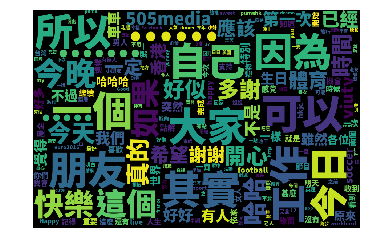

In [38]:
tpath = 'NotoSansCJKtc-Black.otf'
wc = WordCloud(max_font_size=120, relative_scaling=.1,font_path=tpath,width=900, height=600, stopwords=True).fit_words(sorted_word_count_dict)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 200)
plt.show()